<a href="https://colab.research.google.com/github/Abhinav012/Ass1/blob/master/EDA_for_Airbnb_NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Exploratory Data Analysis: Airbnb NYC 2019



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Abhinav Verma


# **Project Summary -**

Airbnb data for New York City 2019 suggest that Manhatten and Brooklyn are the 2 most visited places among those who visited the city. It also suggest that most of the vistors like booking Entire Property/Apt and private rooms over bookings on sharing bases. The finding also shows Manhatten is the most expensive part while Brooklyn is the most prefered part people choose to stay at. If we do analysis on combine neighbourhood than we will find that Bedford, Williamsburg and Harlem are the most popular neighbourhoods among visitors. Analysis on property names suggest that host's have taken complete advantage of using such keywords which will help them attract maximum users by using words such as private room, beautiful, apartment and more in the listed names. A lot of visitors are intrested in staying for 1 to 5 nights, also Bedford-Stuyvesant has the most properties available through out the year and its price is also low. Same goes for Herlem. Over all the analysis is insightful and can help company to make multiple decisions.

# **GitHub Link -**

https://github.com/Abhinav012/Ass1.git

# **Problem Statement**


**Every year their is a surge over number of users who are willing to travel and are focused around making bookings which offer more personalized experience. A common problem in this context is to find a perfect offering which may fit into their budget and is in their interest. To help them in making right choice the study is focused around analysing Airbnb data for year 2019 and finding meaningful insights from individual dimension (depicted by each column). This will also help in making positive impact over business by improving current operational processes or even making platform more user friendly. The surge might also be witnessed with increase in traffic over platform and is bound to have positive impact over business.**

#### **Define Your Business Objective?**

Objective of this analysis is to get an overview of findings which may help the company to focus on core areas where their is a scope of improvement leading to increase in profits.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.style.use('ggplot')

### Dataset Loading

In [3]:
# Load Dataset
drive.mount('/content/drive')
bnb_df=pd.read_csv('/content/drive/MyDrive/Airbnb_NYC_2019.csv')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
bnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
bnb_df.shape


(48895, 16)

### Dataset Information

In [6]:
# Dataset Info
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
bnb_df.duplicated().sum()



0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_vals = bnb_df.isnull()
print(missing_vals.sum().sum())
# name, host_name, last_review, review_per_month are the columns with null values

20141


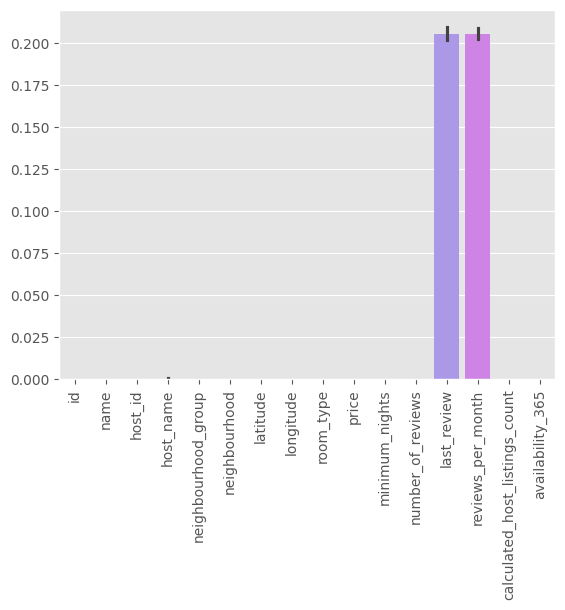

In [9]:
# Visualizing the missing values
sns.barplot(data=missing_vals)
plt.xticks(rotation='vertical',ha='center')
plt.show()

### What did you know about your dataset?

Airbnb data is data collected around range of properties listed over platform divided by boroughs and further divided by neighbourhoods. The dataset holds important information such as property name, its exact location on earth, last visited date, number of visitors till date and property availability through out year.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
bnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Dataset Describe
bnb_df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Variables Description

Following is the description for each variable available in dataset:

*   **ID**: It is the unique identifier for the property and is helpful in identifying the property in the list of availabe records
*   **Name**: Its the name of property listed on the platform.
*   **Host ID**: An identifier for the host (or property owners) which is helpful in finding details belonging to them
*   **Host Name**: Its the name of the host or the property owner who has listed the corresponding property.
*   **Neighbourhood Groups**: Also called borough, each city is divided into regions with administrative significance. Boroughs is exactly what has been explained in the previous statement.
*   **Neighbourhood**: These are small regions inside Boroughs.
*   **Latitude**: Its the latitude of geo location for the property, helpful in determining exact location over earth.
*   **Longitude**: Its the longitude of geo location for the property, helpful in determining exact location over earth.
*   **Room Type**: Property owners are flexible about their offering. They can rent on sharing bases, an entire room or event whole apartment.
*   **Price**: Competitive pricing for individual property listed in the dataset.
*   **Minimum Nights**: Its a constraint offered by owners for the property being listed and signifies minimum number of nights property can be rented.
*   **Number of Reviews**: Its the aggregated value for number of reviews for the property visited and in-direct indication of minimum number of vistors for the property.
*   **Last Review**: Its the date when property was visited last time.
*   **Reviews Per Month**: It explains number of reviews received every month.
*   **Calculated Host Listings Count**: Its the indication of how many property are listed by an individual host over platform.
*   **Availability 365**: It shows count on how many days the property is available to serve the visitors.



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in bnb_df.columns.tolist():
  unique_val=bnb_df.loc[:,col].nunique()
  print(f'{unique_val} is the count for unique {col}')



48895 is the count for unique id
47905 is the count for unique name
37457 is the count for unique host_id
11452 is the count for unique host_name
5 is the count for unique neighbourhood_group
221 is the count for unique neighbourhood
19048 is the count for unique latitude
14718 is the count for unique longitude
3 is the count for unique room_type
674 is the count for unique price
109 is the count for unique minimum_nights
394 is the count for unique number_of_reviews
1764 is the count for unique last_review
937 is the count for unique reviews_per_month
47 is the count for unique calculated_host_listings_count
366 is the count for unique availability_365


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

bnb_df.drop(['last_review'],axis=1,inplace=True)

bnb_df.loc[:,'reviews_per_month'].fillna(0)

bnb_df.drop(['host_id','host_name'],axis=1,inplace=True)

bnb_df['name'] = bnb_df['name'].astype(str)
bnb_df['room_type'] = bnb_df['room_type'].astype(str)

bnb_df.rename(columns={"number_of_reviews":"visitors"},inplace=True)

### What all manipulations have you done and insights you found?

Following are the data wrangling tasks I have done:


*   **Dropping NULL Values**: Since column 'last_review' holds a significant amount of null and there is no way we can fill date values it would be ideal to drop it, so first step I took was to drop 'last_review'.
*   **Filling NULL Values**: Another column 'reviews_per_month' has significant value null but if we check the 'number_of_reviews' we find its value is zero (0), suggesting their are no booking for that property. So we can handle these null values by replacing 'NA' with Zero(0).
*   **Dropping Features**: Since their is no pattern we can get from host_id and host_name for our analysis, it would be ideal to drop them.
*   **Change dtype**: Since 'name' and 'room_type' are in Object type it would be ideal to convert them into Strings so that if required we can easily apply string manipulation operations.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

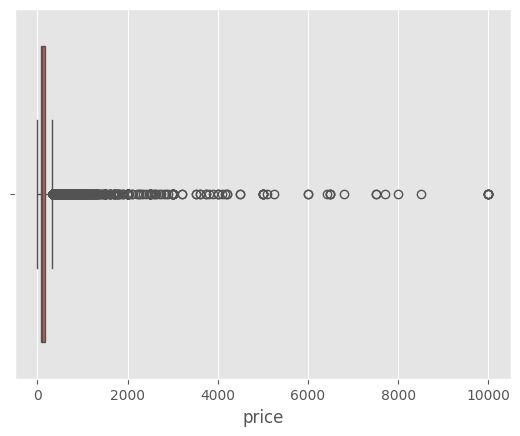

334.0


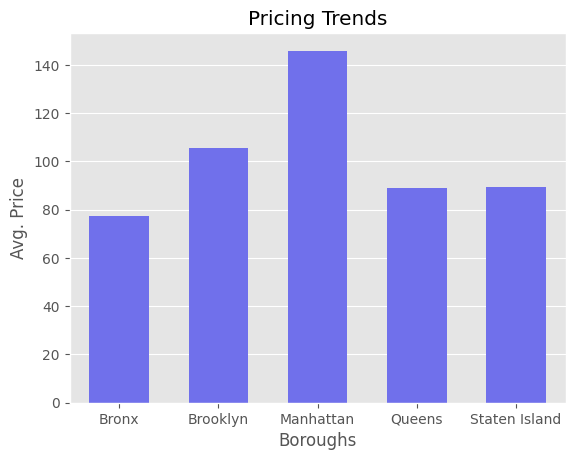

In [14]:
# Chart - 1 visualization code

sns.boxplot(data=bnb_df,x='price')
plt.show()

q1 = np.percentile(bnb_df["price"],25)
q3 = np.percentile(bnb_df["price"],75)
iqr=q3-q1
max = q3+1.5*iqr
print(max)

df = bnb_df.loc[bnb_df['price']<334,:]
mean_price_df=df.groupby("neighbourhood_group")["price"].mean()
mean_price_df=mean_price_df.reset_index()
mean_price_df

sns.barplot(data=mean_price_df, x="neighbourhood_group", y="price",color="#5C5CFF",width=0.6)
plt.xlabel("Boroughs")
plt.ylabel("Avg. Price")
plt.title("Pricing Trends")
plt.show()


##### 1. Why did you pick the specific chart?

The objective of choosing a boxplot was to identify if there exist any outlier in the dataset in regards with pricing trends and to find rental trends grouped by each borough the question is based on categories (5 different Borough's) hence bar chart.

##### 2. What is/are the insight(s) found from the chart?

The Visuals suggest Manhatten is costliest and Bronx is cheapest borough to live by.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes gain insights are bound to have positive impact over business. Their are no negative impact for the gain insight, the observation simply explains that Mannhattan and Brooklyn are the borough, the ones which bring most of the business and Bronx is one which has brings less.

#### Chart - 2

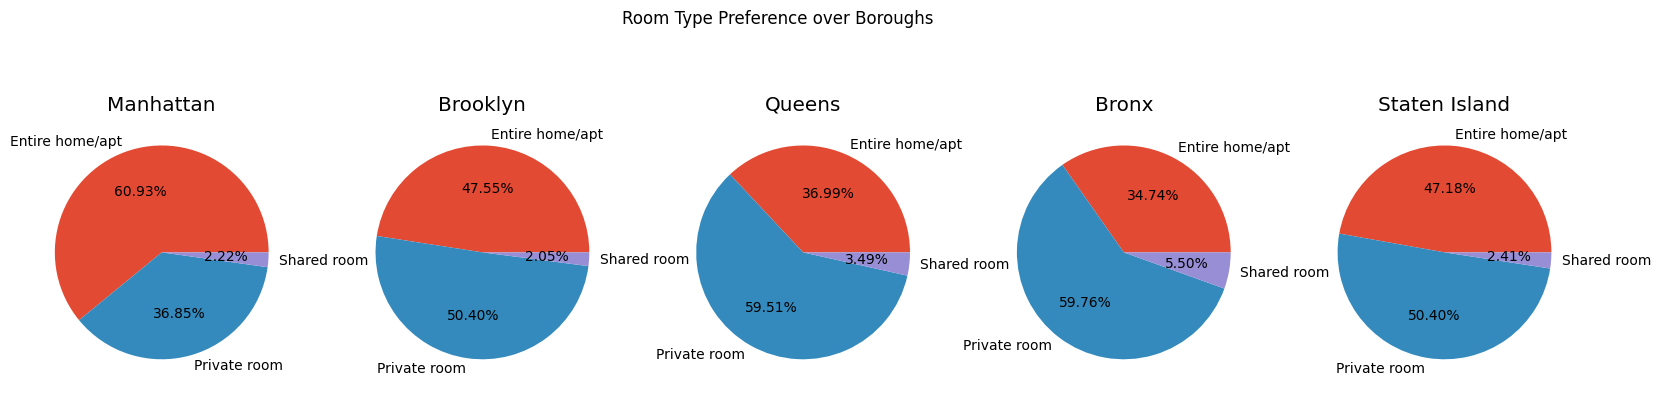

In [15]:
# Following chart shows visitors generally prefer booking for entire home or apartment while they stay
manhattan_pref_df=bnb_df.loc[bnb_df['neighbourhood_group']=='Manhattan',:].groupby('room_type')['id'].count()
manhattan_pref_df = manhattan_pref_df.reset_index()
manhattan_pref_df

brooklyn_pref_df=bnb_df.loc[bnb_df['neighbourhood_group']=='Brooklyn',:].groupby('room_type')['id'].count()
brooklyn_pref_df = brooklyn_pref_df.reset_index()
brooklyn_pref_df

queens_pref_df=bnb_df.loc[bnb_df['neighbourhood_group']=='Queens',:].groupby('room_type')['id'].count()
queens_pref_df = queens_pref_df.reset_index()
queens_pref_df

bronx_pref_df=bnb_df.loc[bnb_df['neighbourhood_group']=='Bronx',:].groupby('room_type')['id'].count()
bronx_pref_df = bronx_pref_df.reset_index()
bronx_pref_df

staten_pref_df=bnb_df.loc[bnb_df['neighbourhood_group']=='Staten Island',:].groupby('room_type')['id'].count()
staten_pref_df = staten_pref_df.reset_index()
staten_pref_df

fig,axs = plt.subplots(1,5,figsize=(20,5))

fig.suptitle('Room Type Preference over Boroughs')

axs[0].pie(manhattan_pref_df['id'], labels=manhattan_pref_df['room_type'], autopct='%.2f%%')
axs[0].set_title('Manhattan')

axs[1].pie(brooklyn_pref_df['id'], labels=brooklyn_pref_df['room_type'], autopct='%.2f%%')
axs[1].set_title('Brooklyn')

axs[2].pie(queens_pref_df['id'], labels=queens_pref_df['room_type'], autopct='%.2f%%')
axs[2].set_title('Queens')

axs[3].pie(bronx_pref_df['id'], labels=bronx_pref_df['room_type'], autopct='%.2f%%')
axs[3].set_title('Bronx')

axs[4].pie(staten_pref_df['id'], labels=staten_pref_df['room_type'], autopct='%.2f%%')
axs[4].set_title('Staten Island')
plt.show()


##### 1. Why did you pick the specific chart?

To get the glimse of what kind of property visitors are interested in, it would be ideal to group data based on 'room_type'. Since 'room_type' is categorised into 3 types, and measure we are talking about are in proportion choosing pie chart would be a good fit.

##### 2. What is/are the insight(s) found from the chart?

The visuals suggest that Manhattan has largest proportion of Entire home or Apartment being booked. If we analyse the complete graph we can easily conclude that all the boroughs have large portion of properties offering Entire aparments and even private rooms. Shared rooms are the one least offered.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight is bound to have a positive impact over business. The Entire Apartment or Private room offering are pricy than shared rooms and generate more revenue for the business. Their are no insights that lead to negative growth.

#### Chart - 3

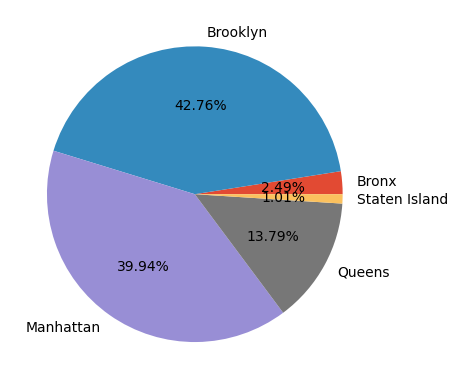

In [16]:
# Chart - 3 visualization code
# Following chart shows visitors generally prefer Brooklyn over Manhattan for their stay
bnb_df.head()
visitors_sum_df = bnb_df.groupby("neighbourhood_group")["visitors"].sum()
visitors_sum_df=visitors_sum_df.reset_index()
visitors_sum_df

plt.pie(visitors_sum_df["visitors"],labels=visitors_sum_df["neighbourhood_group"], autopct="%.2f%%")
plt.show()

##### 1. Why did you pick the specific chart?

Here I am trying to find which is the most prefered borough in terms of visitors stay and since this question is in reference with categories propertion(different boroughs) I have to choose a pie graph.

##### 2. What is/are the insight(s) found from the chart?

From observation we can see that Brooklyn and the Manhattan are the most visited boroughs and are places for visitors stay. Staten Island is the least prefered one.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight will help creating positive impact over business, as our observation goes we have seen that Manhattan and Brooklyn are the one which offer high average rents and this stay trends suggest they are bound to contribute to business revenue as they are the key areas where user are intrested in.

#### Chart - 4

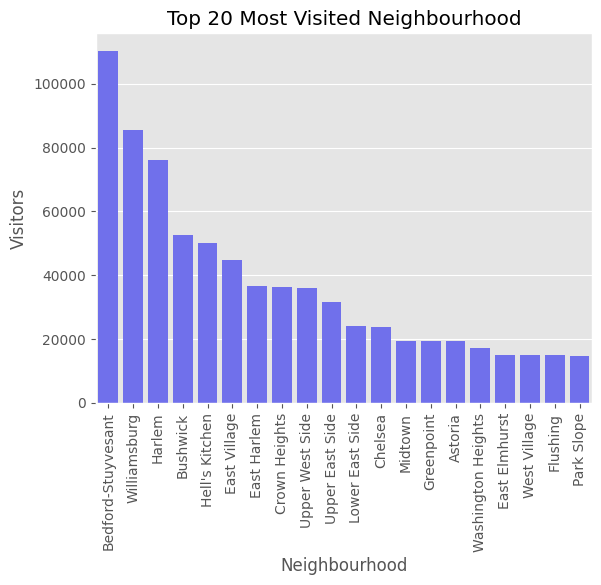

In [29]:

df=bnb_df.groupby("neighbourhood")["visitors"].sum().reset_index()
df=df.sort_values("visitors",ascending=False).head(20)

sns.barplot(data=df,x="neighbourhood",y="visitors",color="#5C5CFF")
plt.xticks(rotation="vertical")
plt.xlabel('Neighbourhood')
plt.ylabel('Visitors')
plt.title('Top 20 Most Visited Neighbourhood')
plt.show()

##### 1. Why did you pick the specific chart?

The insight is about finding top 20 most visited neighbourhood which in nature is a categorical data hence the perfact fit in such a scenario is a bar chart.

##### 2. What is/are the insight(s) found from the chart?

The chart shows top 20 most visited neighbourhood where Bedford-Stuyvesant, Williamsburg, Harlem are the top 3 most visited ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight is expected to bring positive impact over business and their is nothing in relation with negative growth in terms of business. The trend indirectly communicates top 20 boroughs which generate most revenue for the platform and also bring a large business for the place in question.

#### Chart - 5

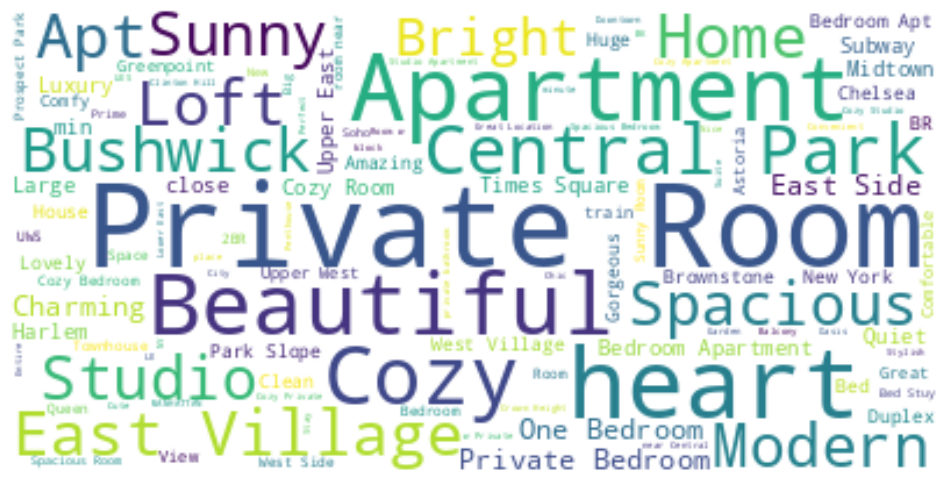

In [18]:
# Chart - 5 visualization code

text = " ".join(i for i in bnb_df['name']).replace("NYC","").replace("Manhattan","").replace("Brooklyn","").replace("Williamsburg","")
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

This time objective was to find most frequently occuring words in the name of property so that we can identify most common words used in property name. So to visualize this word cloud is an ideal choice.

##### 2. What is/are the insight(s) found from the chart?

The above trend shows use of friendly words in listing process can be helpful for visitors in process of their booking. This gives more options for their searches and could be user friendly in terms of choosing their stay nest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The findings are enough to increase lead conversions and will be helpful in business, suggesting a need to make decision into modification in terms of searches and a recommandations to include these words in the new listings names.

#### Chart - 6

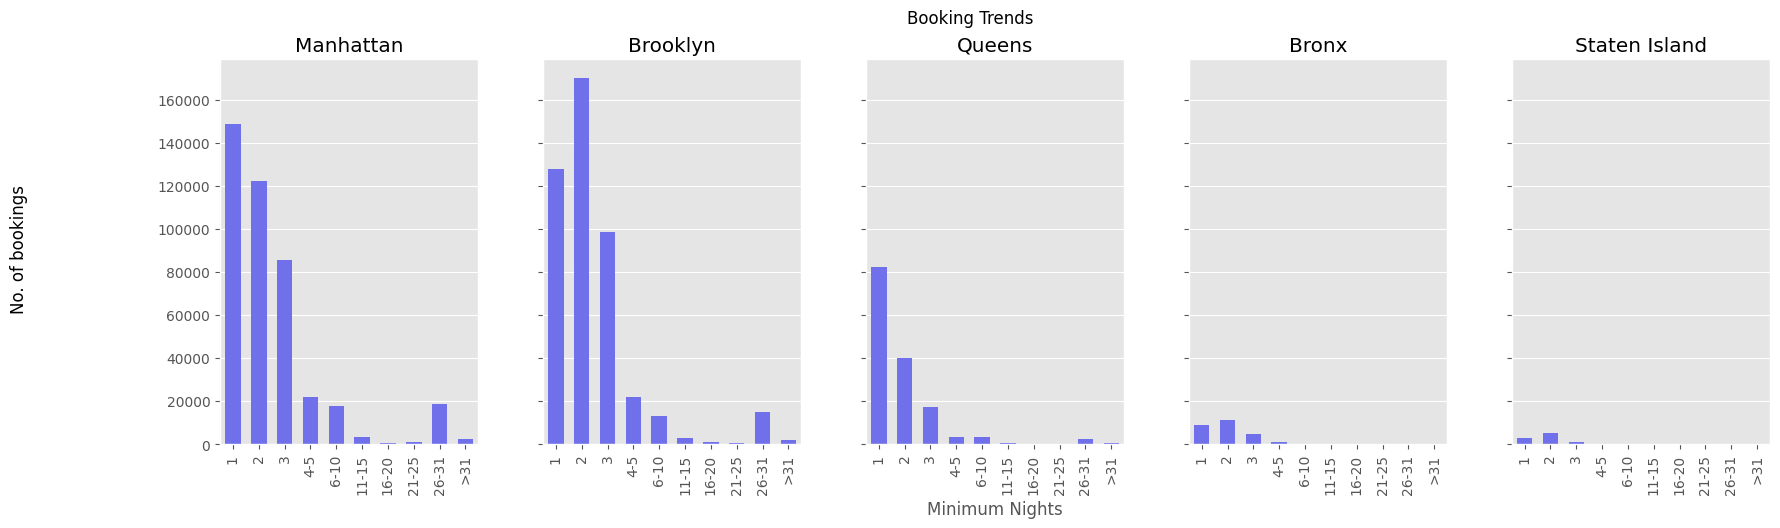

In [31]:
# Chart - 6 visualization code
def assign_bin(min_nights):
  if min_nights == 1:
    return '1'
  elif min_nights == 2:
    return '2'
  elif min_nights == 3:
    return '3'
  elif min_nights > 4 and min_nights <= 5:
    return '4-5'
  elif min_nights > 5 and min_nights <= 10:
    return '6-10'
  elif min_nights > 10 and min_nights <= 15:
    return '11-15'
  elif min_nights > 15 and min_nights <= 20:
    return '16-20'
  elif min_nights > 20 and min_nights <= 25:
    return '21-25'
  elif min_nights > 25 and min_nights <= 31:
    return '26-31'
  elif min_nights > 31:
    return '>31'

order = ['1','2','3','4-5','6-10','11-15','16-20','21-25','26-31','>31']

bnb_df["min_night_bin"] = bnb_df["minimum_nights"].apply(lambda x: assign_bin(x))

bnb_manhattan = bnb_df[bnb_df["neighbourhood_group"] == "Manhattan" ]
bnb_manhattan=bnb_manhattan.groupby("min_night_bin")["visitors"].sum().reset_index()

bnb_brooklyn = bnb_df[bnb_df["neighbourhood_group"] == "Brooklyn" ]
bnb_brooklyn=bnb_brooklyn.groupby("min_night_bin")["visitors"].sum().reset_index()

bnb_queens = bnb_df[bnb_df["neighbourhood_group"] == "Queens" ]
bnb_queens=bnb_queens.groupby("min_night_bin")["visitors"].sum().reset_index()

bnb_bronx = bnb_df[bnb_df["neighbourhood_group"] == "Bronx" ]
bnb_bronx=bnb_bronx.groupby("min_night_bin")["visitors"].sum().reset_index()

bnb_staten = bnb_df[bnb_df["neighbourhood_group"] == "Staten Island" ]
bnb_staten=bnb_staten.groupby("min_night_bin")["visitors"].sum().reset_index()




fig,axis = plt.subplots(1,5,figsize=(20,5),sharey=True)
fig.suptitle("Booking Trends")
fig.supylabel("No. of bookings")
fig.subplots_adjust(hspace=0.7, wspace=0.25)

sns.barplot(ax=axis[0] ,data=bnb_manhattan,x='min_night_bin',y="visitors",order=order, width=0.6,color="#5C5CFF")
axis[0].set_title("Manhattan")
axis[0].set_xlabel("")
axis[0].set_ylabel("")

sns.barplot(ax=axis[1] ,data=bnb_brooklyn,x='min_night_bin',y="visitors",order=order, width=0.6,color="#5C5CFF")
axis[1].set_title("Brooklyn")
axis[1].set_xlabel("")
axis[1].set_ylabel("")

sns.barplot(ax=axis[2] ,data=bnb_queens,x='min_night_bin',y="visitors",order=order, width=0.6,color="#5C5CFF")
axis[2].set_title("Queens")
axis[2].set_xlabel("Minimum Nights")
axis[2].set_ylabel("")

sns.barplot(ax=axis[3] ,data=bnb_bronx,x='min_night_bin',y="visitors",order=order, width=0.6,color="#5C5CFF")
axis[3].set_title("Bronx")
axis[3].set_xlabel("")
axis[3].set_ylabel("")

sns.barplot(ax=axis[4] ,data=bnb_staten,x='min_night_bin',y="visitors",order=order, width=0.6,color="#5C5CFF")
axis[4].set_title("Staten Island")
axis[4].set_xlabel("")
axis[4].set_ylabel("")

for col in range(5):
  axis[col].tick_params(axis='x', rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

The objective was to find number of visits in each borough depending on binned around number if days a visitor has stayed. Hence a combination for subplots and barplots.

##### 2. What is/are the insight(s) found from the chart?

The insights which can drawn out of this suggest that visitors are more intrested in short stays typically 1 to 5 days and the trend is dominant in Manhattan, Brooklyn and we can even consider Queens. Bronx and Staten Island as is already clear are the least picked ones but still hold bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insight is expected to bring positive impact over business. Most frequent booking for 1 to 5 nights can help stack holders to make important decisions which can bring impact and this impact can be measured around KPI's to have an idea how successful this decision was.

#### Chart - 7

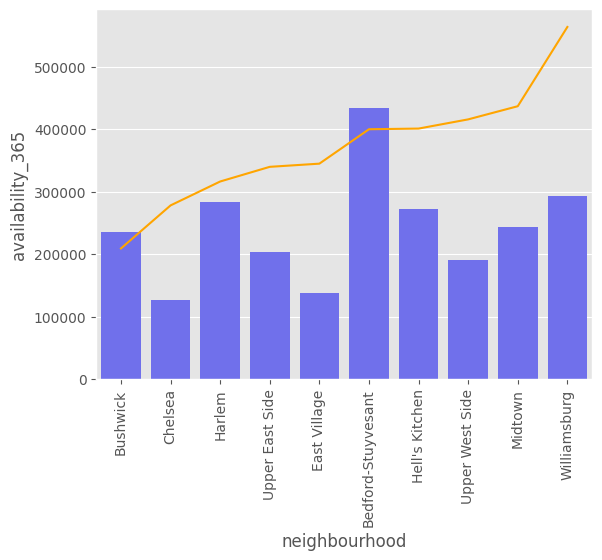

In [32]:
# Chart - 7 visualization code
bnb_price_sum_df = bnb_df.groupby("neighbourhood")["price"].sum().reset_index()
bnb_price_sum_df.sort_values("price",inplace=True,ascending=False)
bnb_price_sum_df=bnb_price_sum_df.head(10).sort_values("price")

neighbour_arr = bnb_price_sum_df["neighbourhood"].values

bnb_avail_365_sum_df = bnb_df.groupby("neighbourhood")["availability_365"].sum().reset_index()
filter_mask = bnb_avail_365_sum_df["neighbourhood"].isin(neighbour_arr)
bnb_avail_365_sum_df = bnb_avail_365_sum_df[filter_mask]
bnb_avail_365_sum_df


plt.plot(bnb_price_sum_df["neighbourhood"],bnb_price_sum_df["price"],color="Orange")
plt.xticks(rotation="vertical")

sns.barplot(data=bnb_avail_365_sum_df,x="neighbourhood",y="availability_365",color="#5C5CFF")
plt.xticks(rotation="vertical")
plt.show()

##### 1. Why did you pick the specific chart?

The situation here was to compare top 10 neighbourhoods with yearly availability and their pricing trend with shared x-axis. Hence choosing bar graph for neighbourhood availabilty through out the year and line graph for pricing trends.

##### 2. What is/are the insight(s) found from the chart?

The observation suggest Bedford-Stuyvesant has the most properties available through out the year and its price is also low. Again same goes for Herlem.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes observation is insightful and is expected to bring positive impact over business.

#### Chart - 8

In [21]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [22]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [23]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [24]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [25]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [26]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-27-e40d1b7d1ab5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=bnb_df.corr(),cmap='coolwarm',annot=True)


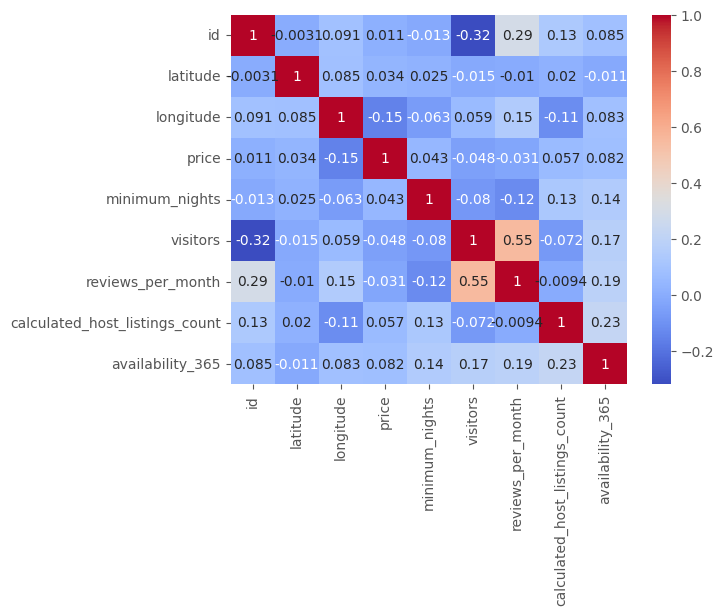

In [27]:
# Correlation Heatmap visualization code
sns.heatmap(data=bnb_df.corr(),cmap='coolwarm',annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

To find out about how much different columns are related to each other heatmap is ideal. The chart depicts the level of correlation between two dimensions and is helpful in deciding on which dimensions we can focus to find trends. The level of correlation is depicted by a value between 1 and -1. Higher the closeness to 1 means a strong positive correlation and higher the closeness to -1 means a strong negative correlation.

##### 2. What is/are the insight(s) found from the chart?

Looking at the correlations annotated on the heatmap doesn't give any strong insight.

#### Chart - 15 - Pair Plot

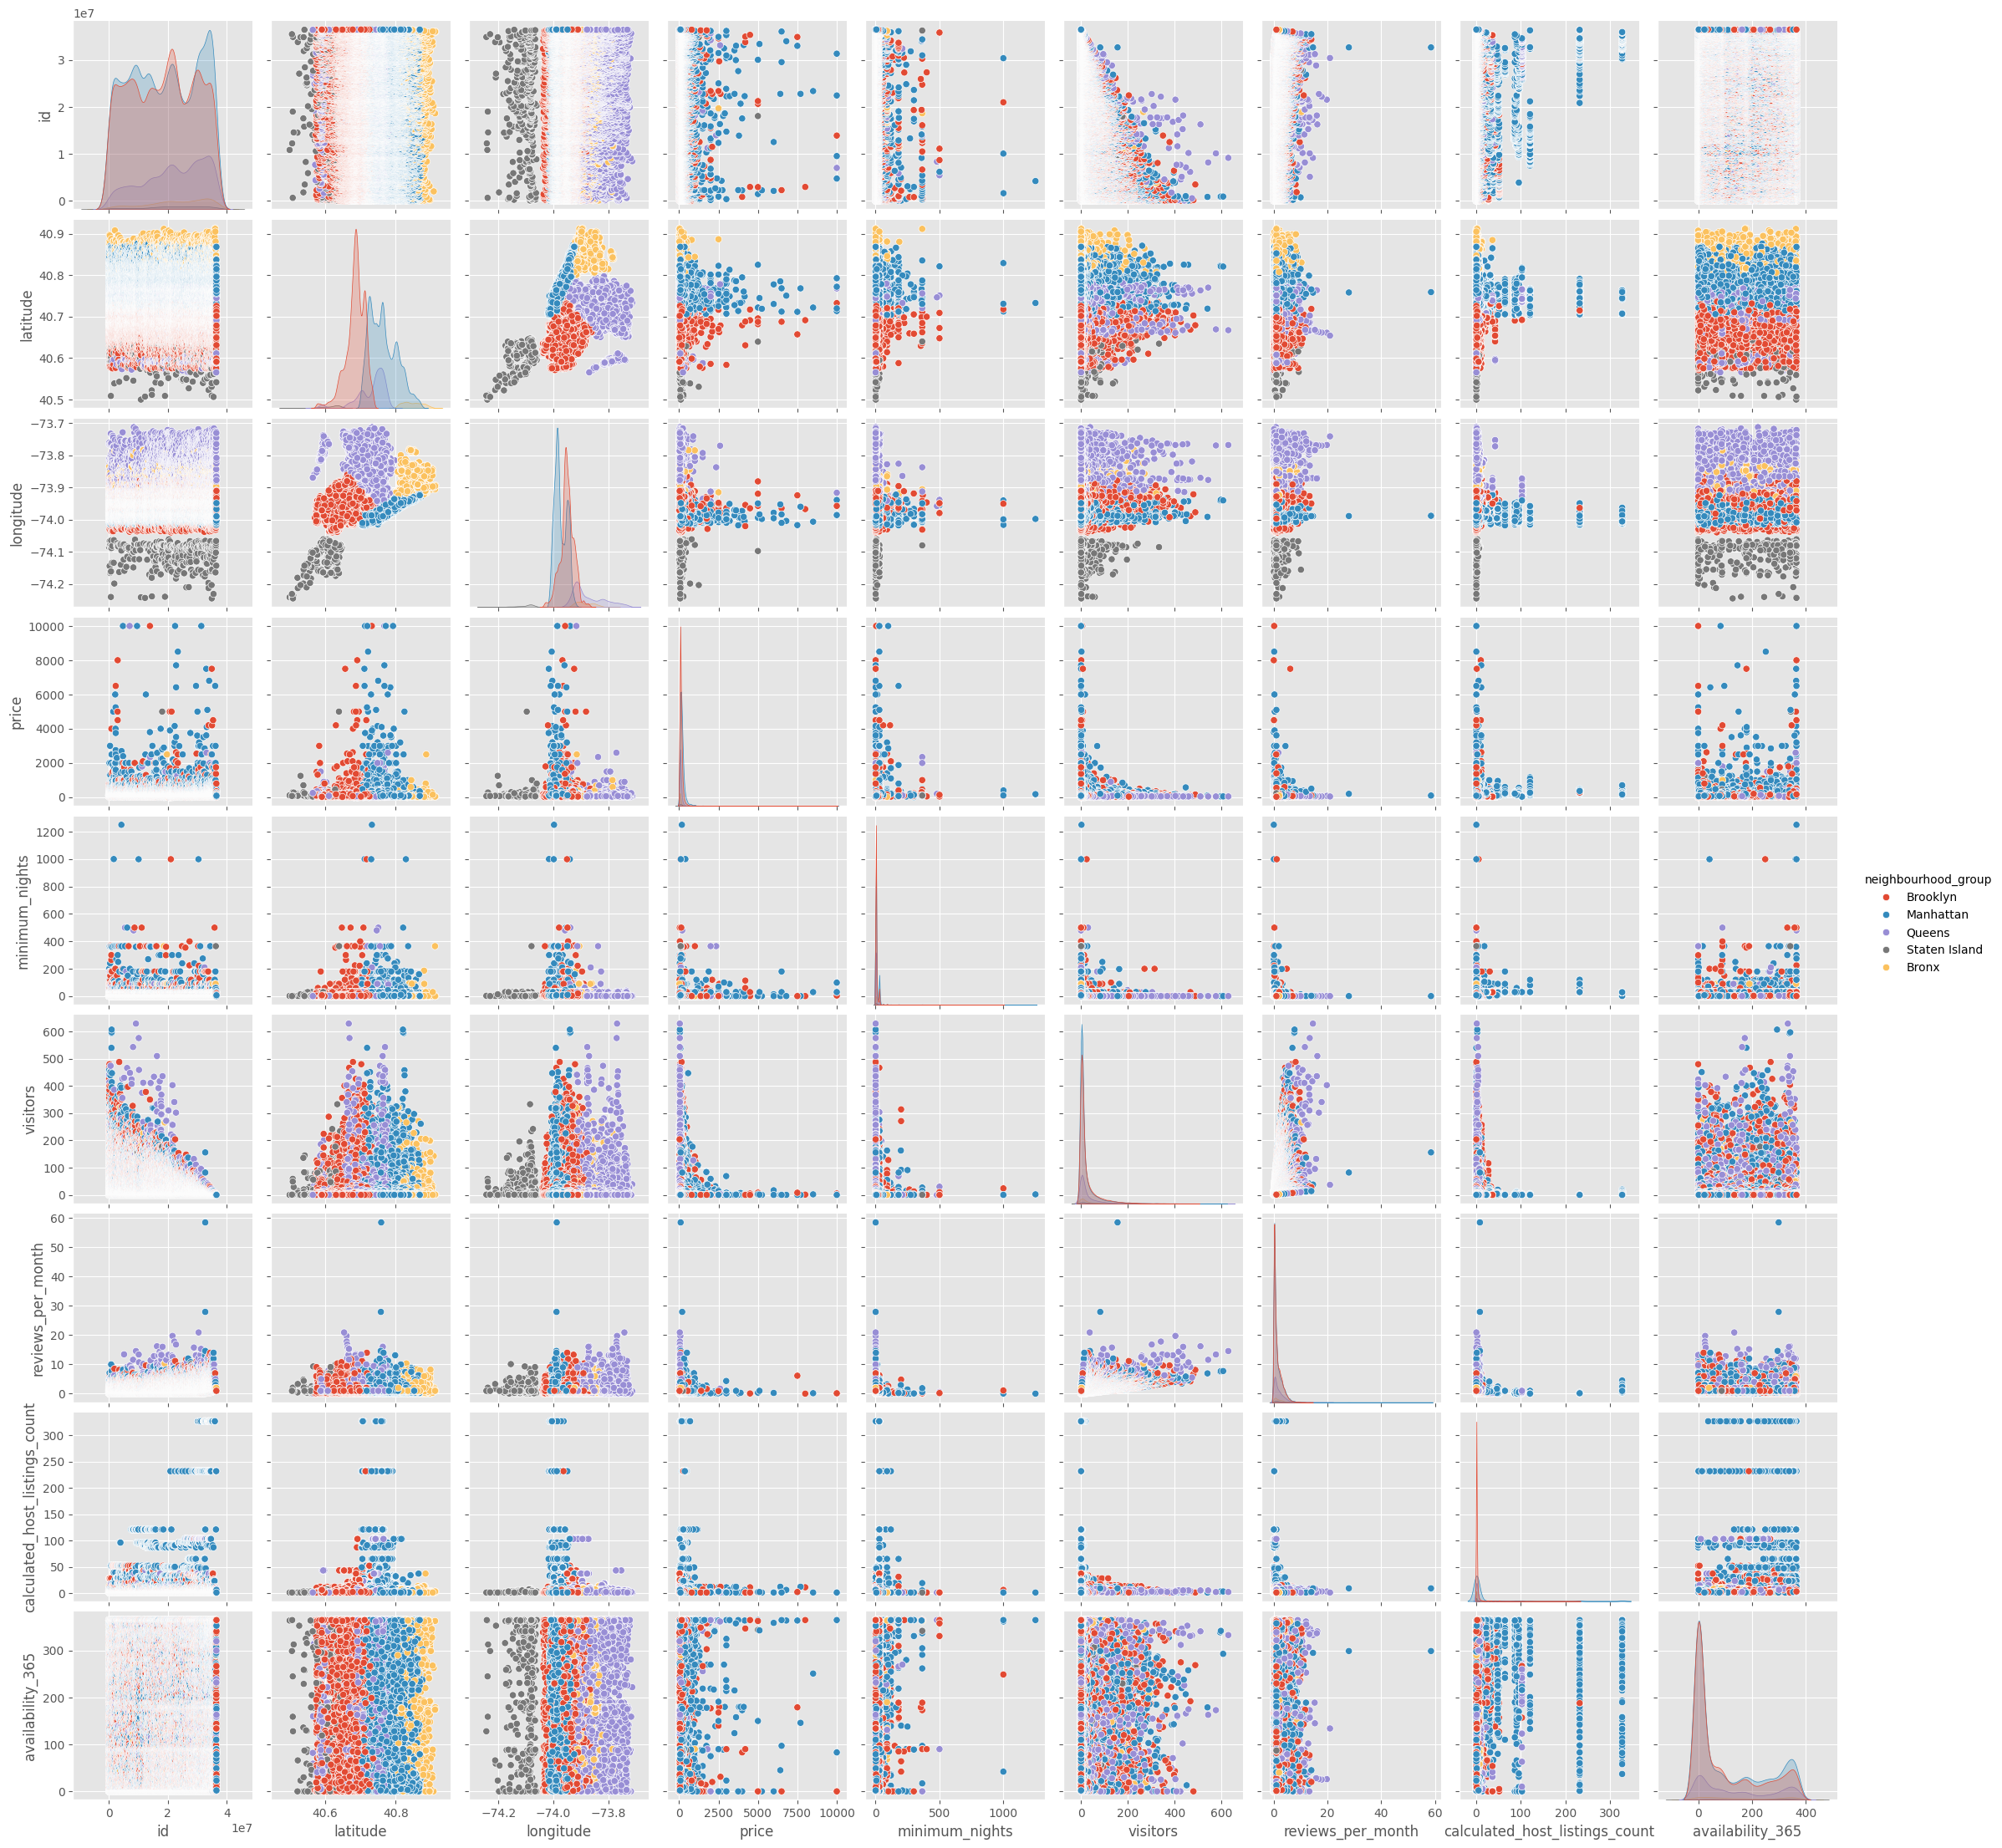

In [28]:
# Pair Plot visualization code
sns.pairplot(data=bnb_df, hue='neighbourhood_group')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize correlation in terms of relation between 2 columns pairplot is an ideal choice. It shows the distribution of points by plotting scatter plot if dimensions in question are not same and a normal distribution incase dimensions are same.

##### 2. What is/are the insight(s) found from the chart?

No clear insight can be infered frpm this chart.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

As per the observations and business objective it would be good to diversify hosted property promotion as Bronx and Staten Island bring least business.
Analysis done also suggest that their is a need to increase scope of visibility of newly hosted properties in the region around Manhatten, Brooklyn, where their is a possibility of bringing more business to platform. It also suggest that by focusing around individuals privacy i.e. offering private aparments or houses and even private rooms for a property at a competitive pricing can be a key factor in generating more revenue which may drive individuals availing shared rooms for their particular reasons change their preference and opt for another property type. Their is also a scope of improvement in the way users search for property. Common words can be deployed into the name of new properties which might increase the chances of their visibility and also open more options for users search, thus increasing the chances of receiving new booking.

# **Conclusion**

To conclude, Airbnb 2019 data is a rich dataset and it offers a lot of insights which are helpful in making business decision, improving product in terms of user experience and drive user engagement by offering product improvements. From this study we first found trends stating that Manhattan and Brooklyn are two boroughs with major contribution to the business where Manhattan is the most expansive borough and Brooklyn being most booked by. We identified to 20 major neighbourhoods from different borough where people have choosen to stay and suggested to promote newly listed properties in these areas. Also a slight change in search policy and suggested use of some user friendly words in the listings name could help users to explore more options which may increase the chances of them making a booking. Booking trends in terms of room type choosen suggested that visitors are serious about their privacy and mostly are motivated to choose whole Apartment/house or even private rooms. This suggest that by offering more compatative pricings there is a possibility of increasing revenue. Atlast I would like to say that keeping business objective's in mind the data set has a lot to offer and is truely a collection to deep dive.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***